<a class="anchor" id="0.1"></a>
## Table of Content
***

0. [Step-00: Import Libraries](#0)

<!-- *** -->

1. [Step-01: Import Dataset](#1)
   - 1.1 [Data Overview](#1.1)
   - 1.2 [Missing Values](#1.2)
   - 1.3 [Numerical Features](#1.3)
   - 1.4 [Discrete Features](#1.4)
   - 1.5 [Continuous Features](#1.5)
   - 1.6 [Catagorical Features](#1.6)
   
<!-- *** -->

2. [Step-02: Data Engineering](#2)
   - 2.1 [Exploratory Data Analysis. (EDA)](#2.1)
     - 2.1.1 [Before Normalization with (Plotting)](#2.1.1)
     - 2.1.2 [Apply Yeo-Johnson transformation](#2.1.2)
     - 2.1.3 [After Normalization with (Plotting)](#2.1.3)
   - 2.2 [Data Wrangling](#2.2)
     - 2.2.1 [Features Encoding](#2.2.1)
     - 2.2.2 [Features Scaling](#2.2.2)

<!-- *** -->

1. [Step-03: Data Cleaning or Organize](#3)
   - 3.1 [Remove Outliers](#3.1)

<!-- *** -->

4. [Step-04: Splitting (Training and Testing) Data](#4)

<!-- *** -->

5. [Step-05: Apply Techniques or Models](#5)
   - 5.1 [Decision Tree](#5.1)
   - 5.2 [Random Forest](#5.2)
   - 5.3 [Gaussian Naive Bayes](#5.3)
   - 5.4 [K-Nearest Neighbors](#5.4)
   - 5.5 [Logistic Regression](#5.5)

<!-- *** -->

6. [Step-06: Evaluate or Compare Models Accuracy](#6)

<!-- *** -->

7. [Apply Cross-Validation](#7)

<!-- *** -->

8. [Best Technique](#8)


## <span style="color:orange">Techniques: <span style="color:yellow">**Logistic Regression**</span>

### Problem:<span style="color:red"> **Classification**</span>

### Dataset: <span style="color:magenta">**Loan Deserving Prediction !**</span>

***

***

### <span style="color:cyan">Step: 00</span>: (Import Libraries) 

<a class="anchor" id="0"></a>

In [76]:
import pandas as pd
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

### <span style="color:cyan">Step: 01</span>: (Import Dataset)

<a class="anchor" id="1"></a>

In [77]:
df = pd.read_csv('loan.csv')
df.sample(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
569,LP002841,Male,Yes,0,Graduate,No,3166,2064.0,104.0,360.0,0.0,Urban,N
296,LP001953,Male,Yes,1,Graduate,No,6875,0.0,200.0,360.0,1.0,Semiurban,Y
48,LP001146,Female,Yes,0,Graduate,No,2645,3440.0,120.0,360.0,0.0,Urban,N
347,LP002131,Male,Yes,2,Not Graduate,No,3083,2168.0,126.0,360.0,1.0,Urban,Y
327,LP002082,Male,Yes,0,Graduate,Yes,5818,2160.0,184.0,360.0,1.0,Semiurban,Y


In [78]:
df.shape

(614, 13)

In [79]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [80]:
df = df.drop(['Loan_ID'], axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [81]:
df['Loan_Status'] = df['Loan_Status'].replace('Y', 'Yes')
df['Loan_Status'] = df['Loan_Status'].replace('N', 'No')
df['Loan_Status']

0      Yes
1       No
2      Yes
3      Yes
4      Yes
      ... 
609    Yes
610    Yes
611    Yes
612    Yes
613     No
Name: Loan_Status, Length: 614, dtype: object

In [82]:
df['Dependents'] = df['Dependents'].replace('3+', '3')
df['Dependents']

0      0
1      1
2      0
3      0
4      0
      ..
609    0
610    3
611    1
612    2
613    0
Name: Dependents, Length: 614, dtype: object

In [83]:
df['LoanAmount'] = df['LoanAmount'].replace(np.nan, df.LoanAmount.mean())
df['LoanAmount']

0      146.412162
1      128.000000
2       66.000000
3      120.000000
4      141.000000
          ...    
609     71.000000
610     40.000000
611    253.000000
612    187.000000
613    133.000000
Name: LoanAmount, Length: 614, dtype: float64

In [84]:
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].replace(np.nan, df.Loan_Amount_Term.mean())
df['Loan_Amount_Term']

0      360.0
1      360.0
2      360.0
3      360.0
4      360.0
       ...  
609    360.0
610    180.0
611    360.0
612    360.0
613    360.0
Name: Loan_Amount_Term, Length: 614, dtype: float64

In [85]:
df['Credit_History'] = df['Credit_History'].replace(np.nan, df.Credit_History.mean())
df['Credit_History']

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
609    1.0
610    1.0
611    1.0
612    1.0
613    0.0
Name: Credit_History, Length: 614, dtype: float64

In [86]:
df = df.dropna()

In [87]:
df.sample(4)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
565,Male,Yes,0,Not Graduate,No,4467,0.0,120.0,360.0,0.842199,Rural,Yes
207,Male,No,0,Not Graduate,No,3975,2531.0,55.0,360.0,1.000000,Rural,Yes
205,Female,No,0,Not Graduate,No,4408,0.0,120.0,360.0,1.000000,Semiurban,Yes
376,Male,Yes,3,Graduate,No,8750,4996.0,130.0,360.0,1.000000,Rural,Yes


In [88]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

***

#### Data Overview

<a class="anchor" id="1.1"></a>


In [89]:
df.shape

(554, 12)

In [90]:
df.nunique()

Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      463
CoapplicantIncome    270
LoanAmount           195
Loan_Amount_Term      11
Credit_History         3
Property_Area          3
Loan_Status            2
dtype: int64

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 554 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             554 non-null    object 
 1   Married            554 non-null    object 
 2   Dependents         554 non-null    object 
 3   Education          554 non-null    object 
 4   Self_Employed      554 non-null    object 
 5   ApplicantIncome    554 non-null    int64  
 6   CoapplicantIncome  554 non-null    float64
 7   LoanAmount         554 non-null    float64
 8   Loan_Amount_Term   554 non-null    float64
 9   Credit_History     554 non-null    float64
 10  Property_Area      554 non-null    object 
 11  Loan_Status        554 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 56.3+ KB


In [92]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,554.000000,554.000000,554.000000,554.000000,554.000000
mean,5267.059567,1585.575668,144.969009,341.956679,0.843348
std,5455.163295,2524.484889,81.078416,64.727653,0.349310
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2843.750000,0.000000,100.000000,360.000000,1.000000
50%,3839.500000,1149.000000,128.000000,360.000000,1.000000
75%,5818.750000,2297.250000,166.750000,360.000000,1.000000
max,81000.000000,33837.000000,650.000000,480.000000,1.000000


In [93]:
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.103279,0.510741,0.002670,-0.043985
CoapplicantIncome,-0.103279,1.000000,0.193454,-0.010906,0.000350
LoanAmount,0.510741,0.193454,1.000000,0.075514,-0.025314
Loan_Amount_Term,0.002670,-0.010906,0.075514,1.000000,0.023112
Credit_History,-0.043985,0.000350,-0.025314,0.023112,1.000000


In [94]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [95]:
df.min()

Gender                 Female
Married                    No
Dependents                  0
Education            Graduate
Self_Employed              No
ApplicantIncome           150
CoapplicantIncome         0.0
LoanAmount                9.0
Loan_Amount_Term         12.0
Credit_History            0.0
Property_Area           Rural
Loan_Status                No
dtype: object

In [96]:
df.max()

Gender                       Male
Married                       Yes
Dependents                      3
Education            Not Graduate
Self_Employed                 Yes
ApplicantIncome             81000
CoapplicantIncome         33837.0
LoanAmount                  650.0
Loan_Amount_Term            480.0
Credit_History                1.0
Property_Area               Urban
Loan_Status                   Yes
dtype: object

#### Missing Values

<a class="anchor" id="1.2"></a>


In [97]:
for feature in df:
    if df[feature].isnull().sum()>1:
        print(feature,":", np.round(df[feature].isnull().mean(),4),'%')
    
else:
     print("There is no Null Values")

There is no Null Values


#### Numerical Features

<a class="anchor" id="1.3"></a>


In [98]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print("The length of Numerical_values is :",len(numerical_features))
df[numerical_features].head()

The length of Numerical_values is : 5


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,146.412162,360.0,1.0
1,4583,1508.0,128.000000,360.0,1.0
2,3000,0.0,66.000000,360.0,1.0
3,2583,2358.0,120.000000,360.0,1.0
4,6000,0.0,141.000000,360.0,1.0


#### Discrete Features 

<a class="anchor" id="1.4"></a>


In [99]:
discrete_Feature = [feature for feature in numerical_features if len(df[feature].unique())<25]

print("The Discrete feature is :",len(discrete_Feature))
discrete_Feature

The Discrete feature is : 2


['Loan_Amount_Term', 'Credit_History']

#### Continuous Features

<a class="anchor" id="1.5"></a>


In [100]:
continous_Feature = [feature for feature in numerical_features if feature not in discrete_Feature]

print("The Continous feature is :",len(continous_Feature))
continous_Feature

The Continous feature is : 3


['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

In [101]:
df[continous_Feature].head()

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,5849,0.0,146.412162
1,4583,1508.0,128.000000
2,3000,0.0,66.000000
3,2583,2358.0,120.000000
4,6000,0.0,141.000000


#### Categorical Features

<a class="anchor" id="1.6"></a>


In [102]:
categorical_feature = [feature for feature in df.columns if df[feature].dtypes =="O"]
print(len(categorical_feature))
categorical_feature

7


['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [103]:
df[categorical_feature].head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Yes
1,Male,Yes,1,Graduate,No,Rural,No
2,Male,Yes,0,Graduate,Yes,Urban,Yes
3,Male,Yes,0,Not Graduate,No,Urban,Yes
4,Male,No,0,Graduate,No,Urban,Yes


---

### <span style="color:cyan">Step: 02</span>: Data Engineering

<a class="anchor" id="2"></a>

#### <span style="color:blue">**Exploratory Data Analysis. (EDA)**</span>


<a class="anchor" id="2.1"></a>

In [104]:
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.103279,0.510741,0.002670,-0.043985
CoapplicantIncome,-0.103279,1.000000,0.193454,-0.010906,0.000350
LoanAmount,0.510741,0.193454,1.000000,0.075514,-0.025314
Loan_Amount_Term,0.002670,-0.010906,0.075514,1.000000,0.023112
Credit_History,-0.043985,0.000350,-0.025314,0.023112,1.000000


<AxesSubplot:>

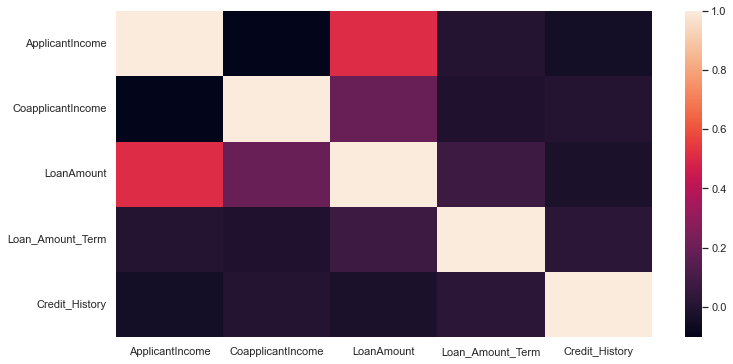

In [105]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr())

<AxesSubplot:>

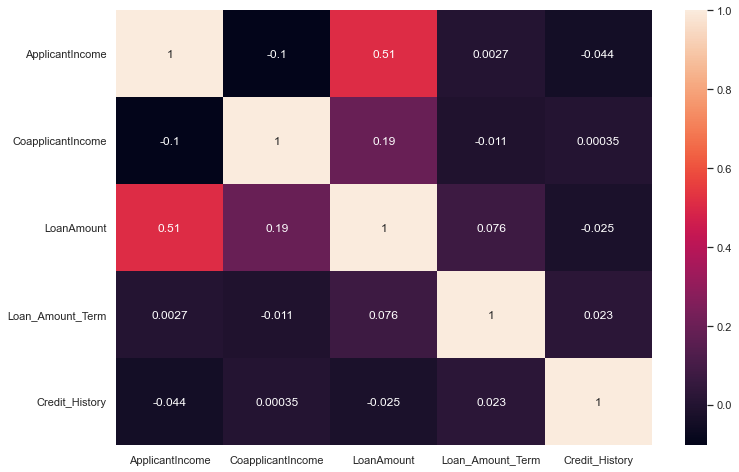

In [106]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)

In [107]:
conti = [i for i in df.columns if i not in ['Gender', 'Married', 'Education', 'Dependents',
                                            'Self_Employed', 'Property_Area', 'Loan_Status']]

***

##### Before Normalization with (Plotting)

<a class="anchor" id="2.1.1"></a>

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


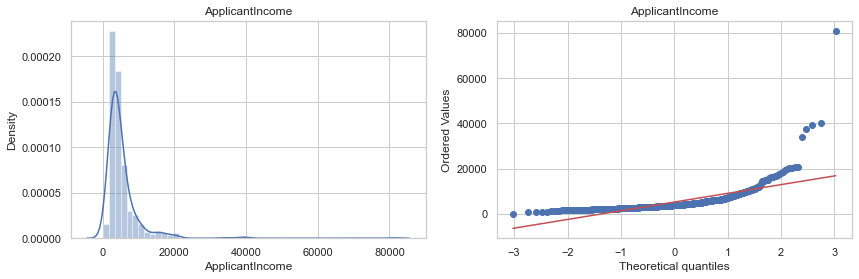

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


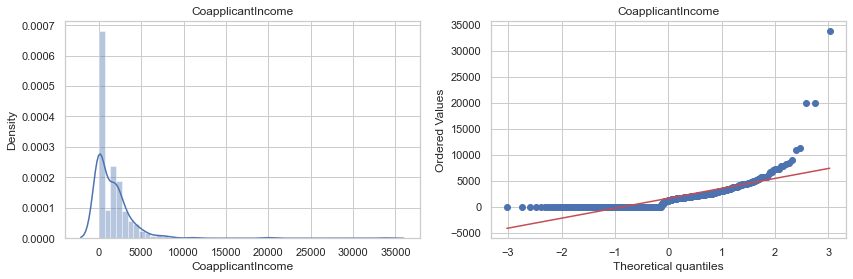

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


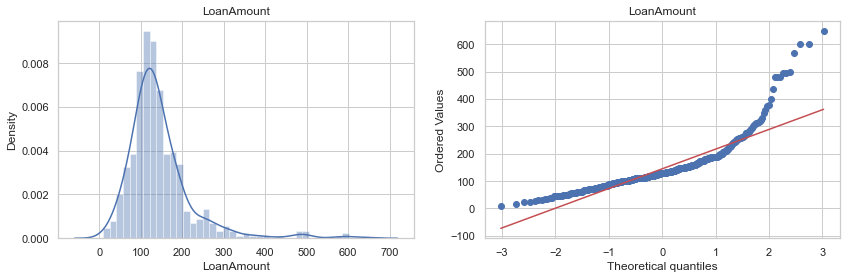

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


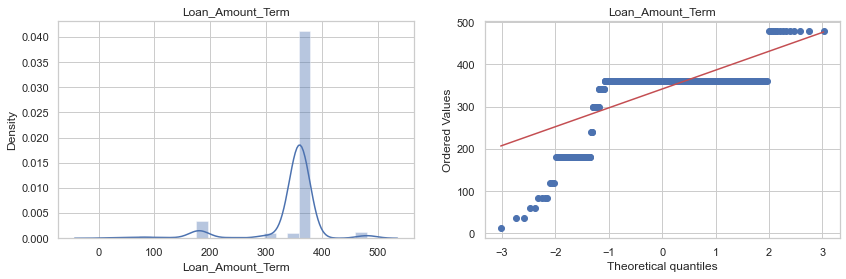

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


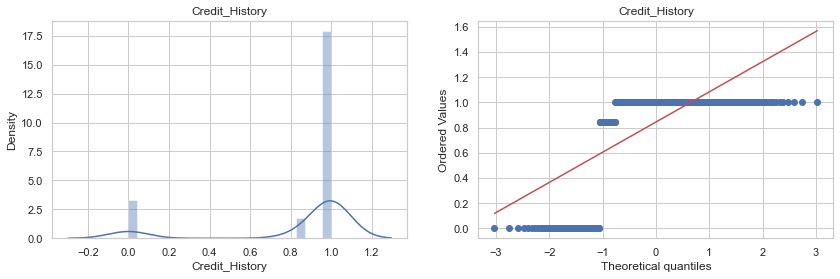

In [108]:
# Plotting the distplots without any transformation

for col in df[conti]:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(df[col])
    plt.title(col)

    plt.subplot(122)
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.title(col)

    plt.show()

In [109]:
df.columns  

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

##### Apply Yeo-Johnson transform

<a class="anchor" id="2.1.2"></a>

In [110]:
features_normalize =[n for n in df.columns if n in ['ApplicantIncome', 'LoanAmount']]
pt = PowerTransformer()
df[features_normalize] = pt.fit_transform(df[features_normalize]+0.00001)

In [111]:
df[features_normalize] = pd.DataFrame(df[features_normalize])
pd.DataFrame({'cols':df[features_normalize].columns,'Yeo_Johnson_lambdas':pt.lambdas_})

,cols,Yeo_Johnson_lambdas
0,ApplicantIncome,-0.148893
1,LoanAmount,0.099280


##### After Normalization with (Plotting)

<a class="anchor" id="2.1.3"></a>

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


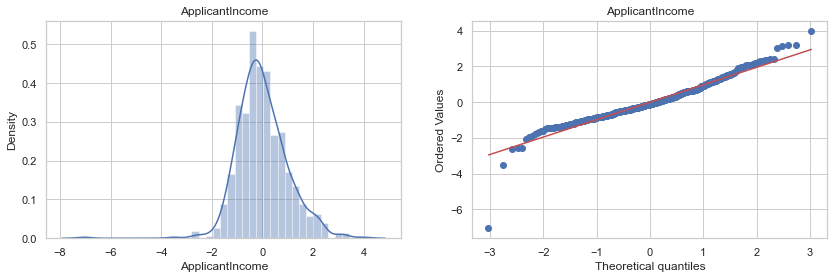

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


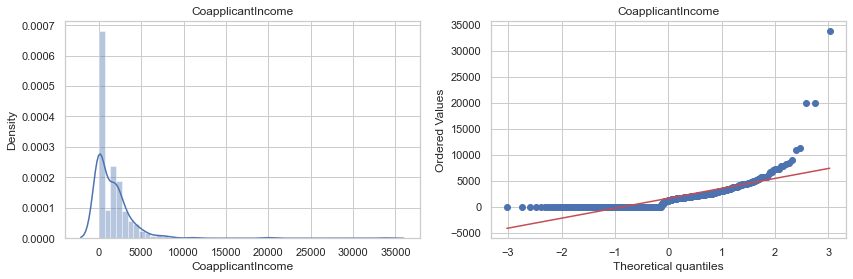

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


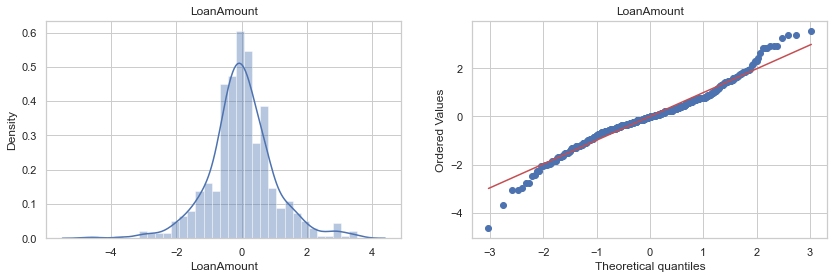

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


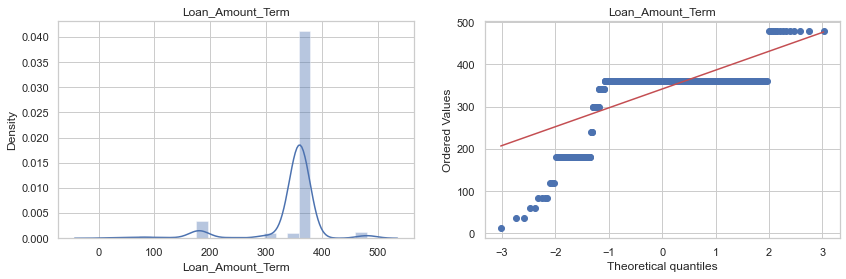

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


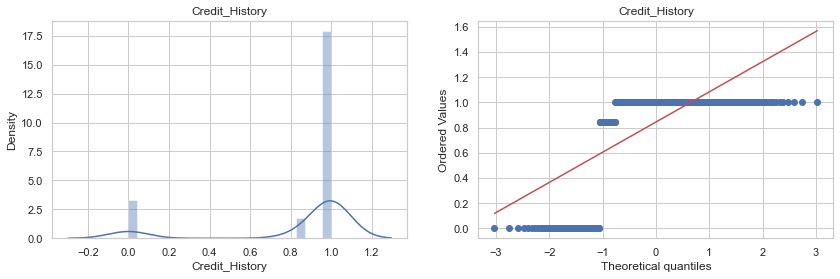

In [112]:
# Plotting the distplots with after transformation

for col in df[conti]:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(df[col])
    plt.title(col)

    plt.subplot(122)
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.title(col)

    plt.show()

In [113]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

***

#### <span style="color:blue">**Data Wrangling**</span>

<a class="anchor" id="2.2"></a>

In [114]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [115]:
df.shape

(554, 12)

##### Feature Encoding

<a class="anchor" id="2.2.1"></a>

In [116]:
encoding = LabelEncoder()
 
encode_feature = [x for x in df.columns if x in ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']]
for i in encode_feature:
    df[i] = encoding.fit_transform(df[i])


In [117]:
df[encode_feature].head(1)

,Gender,Married,Education,Self_Employed,Property_Area
0,1,0,0,0,2


In [118]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,0.582651,0.0,0.243540,360.0,1.0,2,Yes
1,1,1,1,0,0,0.192024,1508.0,-0.030332,360.0,1.0,0,No
2,1,1,0,0,1,-0.521186,0.0,-1.323697,360.0,1.0,2,Yes
3,1,1,0,1,0,-0.784005,2358.0,-0.160468,360.0,1.0,2,Yes
4,1,0,0,0,0,0.622659,0.0,0.166391,360.0,1.0,2,Yes


##### Feature Scaling

<a class="anchor" id="2.2.2"></a>

In [119]:
features_scale =[i for i in df.columns if i not in ['Loan_Status']]

scaler = MinMaxScaler()
df[features_scale] = scaler.fit_transform(df[features_scale])

In [120]:
df[features_scale].head(1)


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,0.0,0.0,0.0,0.0,0.690879,0.0,0.596031,0.74359,1.0,1.0


In [121]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.000000,0.0,0.0,0.690879,0.000000,0.596031,0.74359,1.0,1.0,Yes
1,1.0,1.0,0.333333,0.0,0.0,0.655579,0.044567,0.562575,0.74359,1.0,0.0,No
2,1.0,1.0,0.000000,0.0,1.0,0.591130,0.000000,0.404578,0.74359,1.0,1.0,Yes
3,1.0,1.0,0.000000,1.0,0.0,0.567380,0.069687,0.546677,0.74359,1.0,1.0,Yes
4,1.0,0.0,0.000000,0.0,0.0,0.694494,0.000000,0.586606,0.74359,1.0,1.0,Yes


***

### <span style="color:cyan">Step: 03</span>: Data Cleaned or Organize

<a class="anchor" id="3"></a>

#### Remove Outliers

<a class="anchor" id="3.1"></a>

In [122]:
outliers = [i for i in df.columns if i not in ['Loan_Status']]

In [123]:
print("Before Cleaning:", df.shape)

Before Cleaning: (554, 12)


Before Removing Outliers


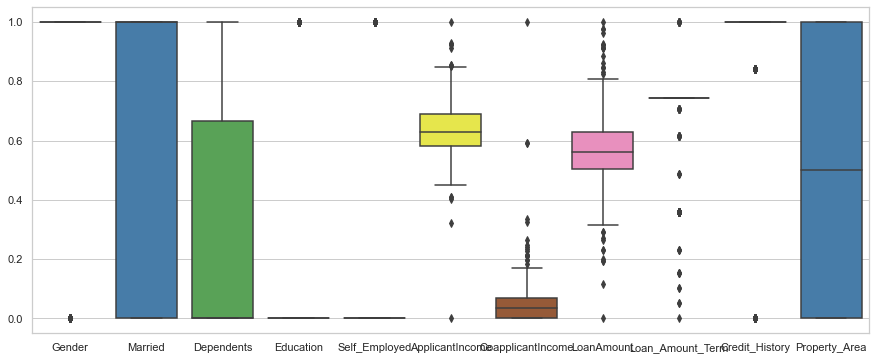

In [124]:
print("Before Removing Outliers")
plt.figure(figsize=(15,6))
sns.set_theme(style="whitegrid", color_codes=True)
sns.boxplot(data=df[outliers],
            palette="Set1")
plt.show()            

***

Before Removing (LoanAmount) outliers


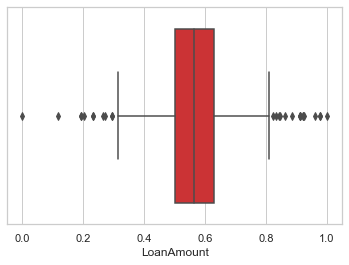

After Removing (LoanAmount) outliers


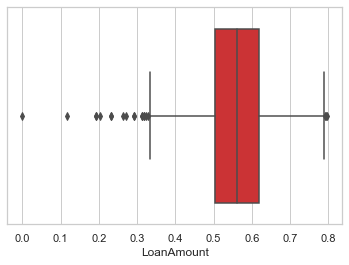

In [125]:
# LoanAmount

print("Before Removing (LoanAmount) outliers")
sns.set_theme(style="whitegrid", color_codes=True)
sns.boxplot(data=df,
            x="LoanAmount",
            palette="Set1")
plt.show()            

df = df[df['LoanAmount']<0.8] 


print("After Removing (LoanAmount) outliers")
sns.set_theme(style="whitegrid", color_codes=True)
sns.boxplot(data=df,
            x="LoanAmount",
            palette="Set1")
plt.show()            

In [126]:
print("Shape:", df.shape)

Shape: (535, 12)


***

In [127]:
print("After Cleaning:", df.shape)

After Cleaning: (535, 12)


After Removing Outliers


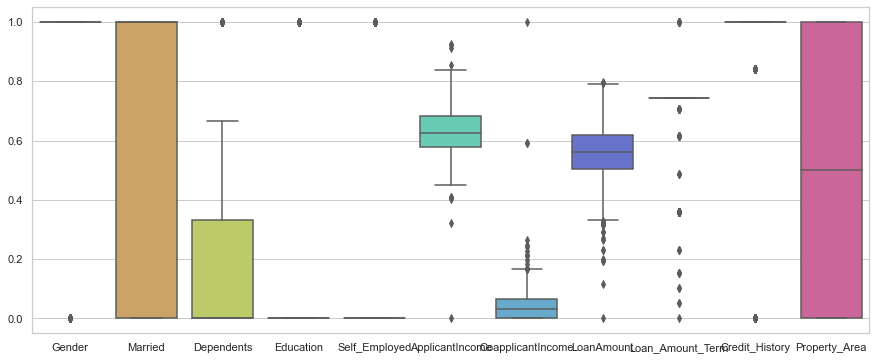

In [128]:
print("After Removing Outliers")
plt.figure(figsize=(15,6))
sns.set_theme(style="whitegrid", color_codes=True)
sns.boxplot(data=df[outliers],
            palette="hls")
plt.show()            

***

### <span style="color:cyan">Step: 04</span>: Splitting Dataset into (Training and Testing) Data 

<a class="anchor" id="4"></a>

In [129]:
X = df.drop(['Loan_Status'], axis=1)
y = df[['Loan_Status']]

In [130]:
X.sample(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
481,1.0,1.0,1.000000,1.0,0.0,0.596011,0.000000,0.531971,0.74359,1.000000,0.0
366,1.0,0.0,0.000000,0.0,0.0,0.562126,0.000000,0.492551,1.00000,1.000000,0.5
129,1.0,1.0,0.000000,0.0,0.0,0.696368,0.075923,0.651208,0.74359,0.842199,0.0
505,1.0,1.0,0.666667,0.0,0.0,0.615484,0.130508,0.726471,0.74359,1.000000,0.0
291,1.0,1.0,0.666667,0.0,0.0,0.649556,0.000000,0.560637,0.74359,0.000000,0.5


In [131]:
y.sample(5)

,Loan_Status
583,No
294,Yes
404,No
279,Yes
315,Yes


In [132]:
y['Loan_Status'].unique()

array(['Yes', 'No'], dtype=object)

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

***

### <span style="color:cyan">Step: 05</span>: Apply Techniques !

<a class="anchor" id="5"></a>

### **Model Building**

<a class="anchor" id="5"></a>

#### <span style="color:yellow">Decision Tree Classifier</span>

<a class="anchor" id="5.1"></a>

In [134]:
# DecisionTreeClassifier

dt_model = DecisionTreeClassifier().fit(X_train, y_train)
dt_model

DecisionTreeClassifier()

In [135]:
y_pred_dt = dt_model.predict(X_test)
y_pred_dt

# Decision tree
dt_score = np.round(accuracy_score(y_test, y_pred_dt)*100, 3)
print("Decision tree:", dt_score)

Decision tree: 69.159


#### <span style="color:yellow">Random Forest Classifier</span>

<a class="anchor" id="5.2"></a>

In [136]:
# RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=1).fit(X_train, y_train)
rf_model

C:\Users\fahad\AppData\Local\Temp\ipykernel_7976\110523400.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model = RandomForestClassifier(n_estimators=1).fit(X_train, y_train)


RandomForestClassifier(n_estimators=1)

In [137]:
y_pred_rf = rf_model.predict(X_test)
y_pred_rf

# Random forest
rf_score = np.round(accuracy_score(y_test, y_pred_rf)*100, 3)
print("Random forest:", rf_score)

Random forest: 71.028


#### <span style="color:yellow">Gaussian Naive Bayes</span>

<a class="anchor" id="5.3"></a>

In [138]:
# GaussianNaiveBayes

gnb_model = GaussianNB().fit(X_train, y_train)
gnb_model

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [139]:
y_pred_gnb = gnb_model.predict(X_test)
y_pred_gnb

# Gussian Naive Bays
gnb_score = np.round(accuracy_score(y_test, y_pred_gnb)*100, 3)
print("GussianNB:", gnb_score)

GussianNB: 83.178


#### <span style="color:yellow">K-Nearest Neighbors Classifier</span>

<a class="anchor" id="5.4"></a>

In [140]:
# KNeighborsClassifier

knn_model = KNeighborsClassifier().fit(X_train, y_train)
knn_model

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [141]:
y_pred_knn = knn_model.predict(X_test)
y_pred_knn

# K_Nearest Neighbours 
knn_score = np.round(accuracy_score(y_test, y_pred_knn)*100, 3)
print("KNN:", knn_score)

KNN: 79.439


#### <span style="color:yellow">Logistic Regression</span>

<a class="anchor" id="5.5"></a>

In [142]:
# LogisticRegression

lr_model = LogisticRegression().fit(X_train, y_train)
lr_model

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [143]:
y_pred_lr = lr_model.predict(X_test)
y_pred_lr

# Logistic Regression 
lr_score = np.round(accuracy_score(y_test, y_pred_lr)*100, 3)
print("Logistic Regression:", lr_score)

Logistic Regression: 84.112


***

### <span style="color:cyan">Step: 06</span>: Evaluate or Compare Models Accuracy

<a class="anchor" id="6"></a>

In [144]:
data={'Decision tree'            :[dt_score],
      'Random Forest'            :[rf_score],
      'Gaussian_NB'              :[gnb_score],
      'KNN'                      :[knn_score],
      'Logistic Regression'      :[lr_score]
}

In [145]:
Evaluation = pd.DataFrame(data, index=['Score'])
Evaluation

,Decision tree,Random Forest,Gaussian_NB,KNN,Logistic Regression
Score,69.159,71.028,83.178,79.439,84.112


***

#### <span style="color:magenta">**Apply Cross-Validation**</span>

<a class="anchor" id="7"></a>

In [146]:
lr_validate = np.round(cross_val_score(lr_model, X, y, cv=6, scoring='accuracy').mean()*100, 3)
print("After cross validation of LR:", lr_validate)

After cross validation of LR: 81.49


C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y t

***

#### <span style="color:green">**Best Technique**</span>: <span style="color:yellow">**Logistic Regression**</span>

<a class="anchor" id="8"></a>

In [147]:
data_best={'Logistic Regression'             :[lr_score],
           'Cross-validate LR'               :[lr_validate]
}

In [148]:
Evaluation = pd.DataFrame(data_best, index=['Score'])
Evaluation

,Logistic Regression,Cross-validate LR
Score,84.112,81.49


***

***

***